In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [3]:
iris = datasets.load_iris()
X = iris.data[:, :2]  
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Accuracy with linear kernel: 80.00%
Accuracy with poly kernel: 73.33%
Accuracy with rbf kernel: 80.00%
Accuracy with sigmoid kernel: 28.89%


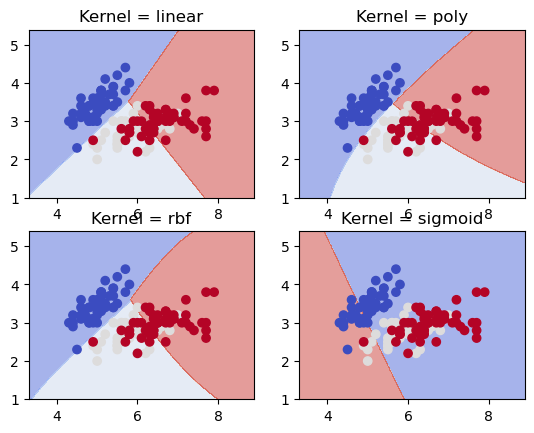

In [4]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
classifiers = [SVC(kernel=kernel) for kernel in kernels]

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    accuracy = classifier.score(X_test, y_test)
    kernel_name = classifier.kernel
    print(f'Accuracy with {kernel_name} kernel: {accuracy * 100:.2f}%')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

for i, classifier in enumerate(classifiers):
    plt.subplot(2, 2, i + 1)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.title(f'Kernel = {kernels[i]}')

plt.show()
